# Section1

# Task 1: SetUp And Dataframe Creation

In [1]:
! pip install pandas

In [2]:
import pandas as pd

Create DataFrame from a dictionary

In [3]:
data_dict = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'City': ['New York', 'Los Angeles', 'Chicago']
}
df_from_dict = pd.DataFrame(data_dict)


Create DataFrame from a list of dictionaries

In [4]:
data_list = [
    {'Name': 'David', 'Age': 40, 'City': 'San Francisco'},
    {'Name': 'Eva', 'Age': 28, 'City': 'Boston'}
]
df_from_list = pd.DataFrame(data_list)


Load dataset from CSV file

In [5]:
df = pd.read_csv('messed_dataset.csv')


# Task 2: Viewing and Inspecting Data

Display the first and last few rows

In [6]:
print(df.head())
print(df.tail())

                Name   Age                Email      Country    Salary  \
0            invalid  59.0  ycastro@example.org  Switzerland  44694.24   
1    David Jefferson  21.0                  NaN        China       NaN   
2      Jessica Reyes  34.0                  NaN          NaN  60511.62   
3  Kenneth Macdonald  68.0    ewolf@example.com        Italy  84223.29   
4        Julie Horne  78.0                  NaN      Ecuador  24665.13   

  DateOfJoining  
0    2022-09-29  
1    2021-10-04  
2    2022-05-24  
3    2022-04-07  
4    2020-06-19  
                  Name   Age                     Email            Country  \
95    Garrett Davidson  56.0        gjames@example.com    Solomon Islands   
96      Elizabeth Ross  52.0  richardlewis@example.net  Equatorial Guinea   
97                 NaN  72.0       brian50@example.com            Somalia   
98      Patricia Singh  65.0      lramirez@example.org             Greece   
99  Christopher Stokes  42.0                       NaN       S

Get a summary of the DataFrame

In [7]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           89 non-null     object
 1   Age            97 non-null     object
 2   Email          80 non-null     object
 3   Country        86 non-null     object
 4   Salary         94 non-null     object
 5   DateOfJoining  79 non-null     object
dtypes: object(6)
memory usage: 4.8+ KB
None
           Name   Age                Email Country   Salary DateOfJoining
count        89    97                   80      86       94            79
unique       85    53                   80      76       93            79
top     invalid  76.0  ycastro@example.org  Greece  invalid    2022-09-29
freq          5     6                    1       2        2             1


Display the shape and column names

In [8]:
print(df.shape)
print(df.columns)


(100, 6)
Index(['Name', 'Age', 'Email', 'Country', 'Salary', 'DateOfJoining'], dtype='object')


# Task 3: Selection and Indexing

Select a single column and multiple columns

In [10]:
single_column = df['Name']
multiple_columns = df[['Email', 'Country']]


Select rows by index and by label

In [11]:
row_by_index = df.iloc[0]  # First row
row_by_label = df.loc[0]   # Assuming 0 is a label in index


Select specific rows and columns using loc and iloc

In [12]:
specific_rows_cols_loc = df.loc[0:2, ['Name', 'Country']]  # Rows 0 to 2 and specific columns
specific_rows_cols_iloc = df.iloc[0:2, 0:2]  # Rows 0 to 2 and first two columns


# Task 4: Handling Missing Data

Identify missing values

In [13]:
missing_values = df.isnull().sum()

Drop rows with missing values

In [14]:
df_dropped = df.dropna()

Fill missing values with a specified value

In [15]:
df_filled = df.fillna(value={'Name': 'Bishwo'})


# Task 5: Data Operations


Add a new column

In [17]:
df['Marital Status'] = 'Married'


Rename columns

In [18]:
df = df.rename(columns={'Name': 'NewName'})


Apply a function to a column

In [19]:
df['NewAge'] = df['Age'].apply(lambda x: x * 2)


In [20]:
df.head()

,NewName,Age,Email,Country,Salary,DateOfJoining,Maritial Status,Marital Status,NewAge
0,invalid,59.0,ycastro@example.org,Switzerland,44694.24,2022-09-29,Married,Married,59.059.0
1,David Jefferson,21.0,NaN,China,NaN,2021-10-04,Married,Married,21.021.0
2,Jessica Reyes,34.0,NaN,NaN,60511.62,2022-05-24,Married,Married,34.034.0
3,Kenneth Macdonald,68.0,ewolf@example.com,Italy,84223.29,2022-04-07,Married,Married,68.068.0
4,Julie Horne,78.0,NaN,Ecuador,24665.13,2020-06-19,Married,Married,78.078.0


# Task 6: GroupBy Operations

Group the DataFrame by a column and calculate summary statistics

In [27]:

non_numeric_ages = df['Age'].apply(lambda x: not str(x).isdigit())
print("Non-numeric ages:")
print(df[non_numeric_ages])

df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

df = df.dropna(subset=['Age'])

df['Age'] = df['Age'].astype(int)

non_numeric_columns = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:")
print(non_numeric_columns)

df_numeric = df.drop(columns=non_numeric_columns)

grouped = df_numeric.groupby('Age').mean()
print("Grouped data:")
print(grouped)

Non-numeric ages:
Empty DataFrame
Columns: [NewName, Age, Email, Country, Salary, DateOfJoining, Maritial Status, Marital Status, NewAge]
Index: []
Non-numeric columns:
Index(['NewName', 'Email', 'Country', 'Salary', 'DateOfJoining',
       'Maritial Status', 'Marital Status', 'NewAge'],
      dtype='object')
Grouped data:
Empty DataFrame
Columns: []
Index: [18, 19, 20, 21, 22, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 38, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 61, 64, 65, 66, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80]


C:\Users\Bishwo\AppData\Local\Temp\ipykernel_8056\234877953.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = pd.to_numeric(df['Age'], errors='coerce')


In [28]:
for name, group in df.groupby('Age'):
    print(name)
    print(group)


18
             NewName  Age Email Country    Salary DateOfJoining  \
46  Marissa Williams   18   NaN     NaN  46658.98    2020-07-14   

   Maritial Status Marital Status    NewAge  
46         Married        Married  18.018.0  
19
             NewName  Age                  Email  Country    Salary  \
57           invalid   19                    NaN      NaN  36728.76   
69  Michael Oconnell   19  fdelacruz@example.org  Grenada  62929.05   

   DateOfJoining Maritial Status Marital Status    NewAge  
57    2021-04-22         Married        Married  19.019.0  
69    2022-01-21         Married        Married  19.019.0  
20
   NewName  Age Email                    Country    Salary DateOfJoining  \
25     NaN   20   NaN  Bouvet Island (Bouvetoya)  73892.64    2023-08-26   

   Maritial Status Marital Status    NewAge  
25         Married        Married  20.020.0  
21
            NewName  Age Email   Country    Salary DateOfJoining  \
1   David Jefferson   21   NaN     China       NaN    

# Task 7: Merging and Joining DataFrames

Merge two DataFrames on a common column

In [29]:
df1 = pd.DataFrame({'key': ['A', 'B', 'C'], 'value': [1, 2, 3]})
df2 = pd.DataFrame({'key': ['A', 'B', 'D'], 'value': [4, 5, 6]})
merged_df = pd.merge(df1, df2, on='key')


Join two DataFrames using their indices

In [30]:
df1 = pd.DataFrame({'value': [1, 2, 3]}, index=['A', 'B', 'C'])
df2 = pd.DataFrame({'value': [4, 5, 6]}, index=['A', 'B', 'D'])
joined_df = df1.join(df2, lsuffix='_left', rsuffix='_right')


 # Task 8: Working with Dates and Times

Create a datetime index for the DataFrame

In [37]:
df['DateOfJoining'] = pd.to_datetime(df['DateOfJoining'], errors='coerce')
df.set_index('DateOfJoining', inplace=True)
print(df.head())


                         NewName  Age                Email      Country  \
DateOfJoining                                                             
2022-09-29               invalid   59  ycastro@example.org  Switzerland   
2021-10-04       David Jefferson   21                  NaN        China   
2022-05-24         Jessica Reyes   34                  NaN          NaN   
2022-04-07     Kenneth Macdonald   68    ewolf@example.com        Italy   
2020-06-19           Julie Horne   78                  NaN      Ecuador   

                 Salary Maritial Status Marital Status    NewAge  
DateOfJoining                                                     
2022-09-29     44694.24         Married        Married  59.059.0  
2021-10-04          NaN         Married        Married  21.021.0  
2022-05-24     60511.62         Married        Married  34.034.0  
2022-04-07     84223.29         Married        Married  68.068.0  
2020-06-19     24665.13         Married        Married  78.078.0  


Convert a column to datetime and extract date components

In [43]:

print(df.columns)

print(df.head())


Index(['NewName', 'Age', 'Email', 'Country', 'Salary', 'Maritial Status',
       'Marital Status', 'NewAge'],
      dtype='object')
                         NewName  Age                Email      Country  \
DateOfJoining                                                             
2022-09-29               invalid   59  ycastro@example.org  Switzerland   
2021-10-04       David Jefferson   21                  NaN        China   
2022-05-24         Jessica Reyes   34                  NaN          NaN   
2022-04-07     Kenneth Macdonald   68    ewolf@example.com        Italy   
2020-06-19           Julie Horne   78                  NaN      Ecuador   

                 Salary Maritial Status Marital Status    NewAge  
DateOfJoining                                                     
2022-09-29     44694.24         Married        Married  59.059.0  
2021-10-04          NaN         Married        Married  21.021.0  
2022-05-24     60511.62         Married        Married  34.034.0  
2022-04

In [44]:

df.reset_index(inplace=True)

# Rename the index column to DateOfJoining
df.rename(columns={'DateOfJoining': 'Date'}, inplace=True)

# Convert 'Date' to datetime, coercing errors to NaT
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


print(df.head())


        Date            NewName  Age                Email      Country  \
0 2022-09-29            invalid   59  ycastro@example.org  Switzerland   
1 2021-10-04    David Jefferson   21                  NaN        China   
2 2022-05-24      Jessica Reyes   34                  NaN          NaN   
3 2022-04-07  Kenneth Macdonald   68    ewolf@example.com        Italy   
4 2020-06-19        Julie Horne   78                  NaN      Ecuador   

     Salary Maritial Status Marital Status    NewAge    Year  Month   Day  
0  44694.24         Married        Married  59.059.0  2022.0    9.0  29.0  
1       NaN         Married        Married  21.021.0  2021.0   10.0   4.0  
2  60511.62         Married        Married  34.034.0  2022.0    5.0  24.0  
3  84223.29         Married        Married  68.068.0  2022.0    4.0   7.0  
4  24665.13         Married        Married  78.078.0  2020.0    6.0  19.0  


# Task 9: Input and Output

Read data from a CSV file into a DataFram

In [45]:
df_csv = pd.read_csv('messed_dataset.csv')


Write the DataFrame to a CSV file

In [47]:
df.to_csv('output.csv', index=False)


Read data from an Excel file into a DataFrame

In [48]:
df_excel = pd.read_excel('SaleData.xlsx')


Write the DataFrame to an Excel file

In [49]:
df.to_excel('output.xlsx', index=False)


# Section 2: Visualization

Task 10: Visualization

Create a simple plot using Matplotlib

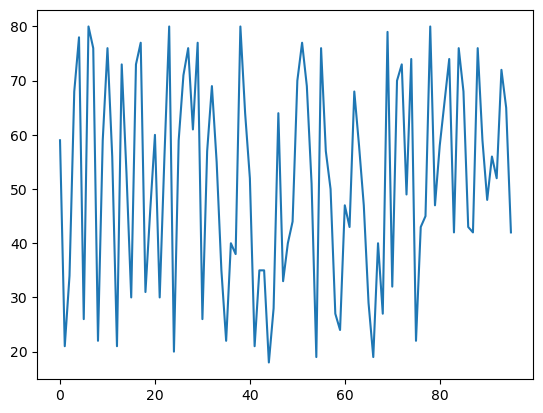

In [51]:
import matplotlib.pyplot as plt
df['Age'].plot()
plt.show()



Create a bar plot using Seaborn:

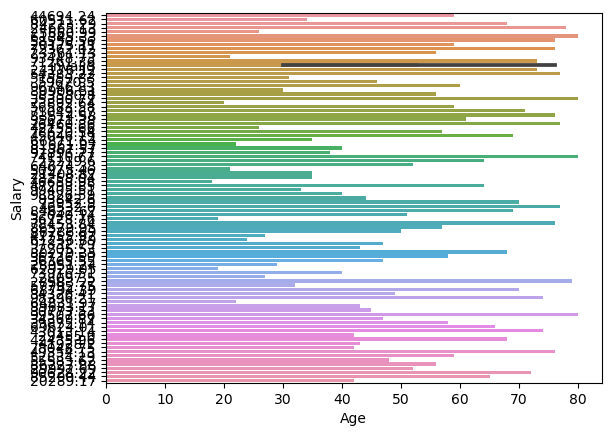

In [52]:
import seaborn as sns
sns.barplot(x='Age', y='Salary', data=df)
plt.show()
